In [3]:
import numpy as np
from tqdm import tqdm
from scipy.sparse import csr_array
import matplotlib.pyplot as plt
import pickle
import warnings
import pandas
import time
import pickle
# import hypernetx as hnx
from itertools import chain
import pyalex
import json
import os
from pyalex import Works, Authors, Sources, Institutions, Topics, Publishers, Funders

from OpenAlex import *


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
pyalex.config.email = "l.jiaze@maastrichtuniversity.nl"
pyalex.config.max_retries = 0
pyalex.config.retry_backoff_factor = 0.1
pyalex.config.retry_http_codes = [429, 500, 503]

In [7]:
def print_json(sample):
    print(json.dumps(sample, indent=4))

# Observe Example

In [37]:
title = "The Recent Asian Wave in Tourism Research: The Case of the Journal of Travel & Tourism Marketing"
works = Works().search_filter(title=title).get()
root_work = works[0]

In [12]:
print(type(works))

<class 'pyalex.api.OpenAlexResponseList'>


In [10]:
work[0]["primary_location"]["source"]

{'id': 'https://openalex.org/S171614947',
 'display_name': 'Asia Pacific Journal of Tourism Research',
 'issn_l': '1094-1665',
 'issn': ['1094-1665', '1741-6507'],
 'is_oa': False,
 'is_in_doaj': False,
 'is_indexed_in_scopus': True,
 'is_core': True,
 'host_organization': 'https://openalex.org/P4310319847',
 'host_organization_name': 'Routledge',
 'host_organization_lineage': ['https://openalex.org/P4310319847'],
 'host_organization_lineage_names': ['Routledge'],
 'type': 'journal'}

In [8]:
print_json(work)

[
    {
        "id": "https://openalex.org/W2011513577",
        "doi": "https://doi.org/10.1080/10941665.2014.881895",
        "title": "The Recent Asian Wave in Tourism Research: The Case of the<i>Journal of Travel &amp; Tourism Marketing</i>",
        "display_name": "The Recent Asian Wave in Tourism Research: The Case of the<i>Journal of Travel &amp; Tourism Marketing</i>",
        "relevance_score": 424.88217,
        "publication_year": 2014,
        "publication_date": "2014-02-05",
        "ids": {
            "openalex": "https://openalex.org/W2011513577",
            "doi": "https://doi.org/10.1080/10941665.2014.881895",
            "mag": "2011513577"
        },
        "language": "en",
        "primary_location": {
            "is_oa": false,
            "landing_page_url": "https://doi.org/10.1080/10941665.2014.881895",
            "pdf_url": null,
            "source": {
                "id": "https://openalex.org/S171614947",
                "display_name": "Asia Pacif

In [14]:
# cited_works = Works()[works[0]["referenced_works"]]
citing_works = Works().filter(cites=works[0]["id"].split('/')[-1]).get()

In [15]:
print(type(citing_works))

<class 'pyalex.api.OpenAlexResponseList'>


In [18]:
citing_works_alexlink = [work["id"] for work in citing_works]
# print(citing_works_alexid)

In [26]:
cited_works_alexlink = works[0]["referenced_works"]

In [39]:
select_works = citing_works_alexlink + cited_works_alexlink + [root_work["id"]]

In [40]:
alex = Alex(works=select_works)

Loading works...: 100%|███████████████████████████████████████████████████████████| 199/199 [00:00<00:00, 28425.79it/s]

Number of Author 411, Number of Paper 199 
 Average #_papers per author 1.2092457420924574 
 Average #_coauthors per paper 2.4974874371859297
Number of topics 35.
Most cite 224 works, least cite 0 works.


In [41]:
alex.construct_citation_matrix()

Constructing citation matrix...: 100%|████████████████████████████████████████████| 199/199 [00:00<00:00, 99211.52it/s]


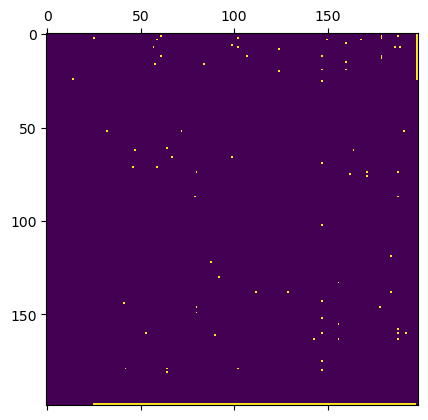

In [42]:
plt.matshow(alex.citation_A.toarray())